# Configure environment


In [48]:
!nvidia-smi

Wed Nov 11 02:41:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 455.32.00    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P2000        On   | 00000000:01:00.0  On |                  N/A |
| N/A   46C    P0    N/A /  N/A |    607MiB /  4031MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [49]:
!nvidia-settings -q CUDACores -t

768
768


In [4]:
!lscpu

Architektur:                     x86_64
CPU Operationsmodus:             32-bit, 64-bit
Byte-Reihenfolge:                Little Endian
Adressgrößen:                    39 bits physical, 48 bits virtual
CPU(s):                          12
Liste der Online-CPU(s):         0-11
Thread(s) pro Kern:              2
Kern(e) pro Socket:              6
Sockel:                          1
NUMA-Knoten:                     1
Anbieterkennung:                 GenuineIntel
Prozessorfamilie:                6
Modell:                          158
Modellname:                      Intel(R) Core(TM) i7-8850H CPU @ 2.60GHz
Stepping:                        10
CPU MHz:                         4100.817
Maximale Taktfrequenz der CPU:   4300,0000
Minimale Taktfrequenz der CPU:   800,0000
BogoMIPS:                        5199.98
Virtualisierung:                 VT-x
L1d Cache:                       192 KiB
L1i Cache:                       192 KiB
L2 Cache:                        1,5 MiB
L3 Cache:                  

In [1]:
import os
import numpy as np
import pandas as pd

In [ ]:
running_type = 'C'
threads = 6
experiments = 10

# {'name': 'S', 'max': 1, 'partitions': 1}, {'name': 'O', 'max': 24, 'partitions': 16}, 

types = [{'name': 'C', 'max': 128 * 4, 'partitions': 20}]

for t in types:
    for threads in np.linspace(1, t['max'], t['partitions']):
        for e in range(experiments):
            os.system("./bin/violajones {} {}".format(t['name'], int(threads)))

In [3]:
!cat output.csv

C, 4.921130,4.92113,1,63961,128,6
C, 2.207512,2.20751,27,2369,128,6
C, 2.215525,2.21553,54,1185,128,6
C, 2.218316,2.21832,81,790,128,6
C, 3.8757,3.00876,108,593,128,6
C, 2.913839,2.91384,135,500,128,6
C, 2.647211,2.64721,162,500,128,6
C, 2.296313,2.29632,189,500,128,6
C, 2.421561,2.42156,216,500,128,6
C, 2.890835,2.89084,243,500,128,6
C, 2.310314,2.31032,269,500,128,6
C, 3.159792,3.1598,296,500,128,6
C, 2.336215,2.33622,323,500,128,6
C, 2.334680,2.33468,350,500,128,6
C, 2.772788,2.77279,377,500,128,6
C, 2.388472,2.38848,404,500,128,6
C, 2.431313,2.43132,431,500,128,6
C, 2.380752,2.38076,458,500,128,6
C, 2.593222,2.59323,485,500,128,6
C, 2.390930,2.39093,512,500,128,6


In [4]:
import pandas as pd
df = pd.read_csv("output.csv", names=('Type', "Time 1", "Time 2", "Threads", "Blocks", "Cores", "MPs"))
df

,Type,Time 1,Time 2,Threads,Blocks,Cores,MPs
0,C,4.921130,4.92113,1,63961,128,6
1,C,2.207512,2.20751,27,2369,128,6
2,C,2.215525,2.21553,54,1185,128,6
3,C,2.218316,2.21832,81,790,128,6
4,C,3.875700,3.00876,108,593,128,6
5,C,2.913839,2.91384,135,500,128,6
6,C,2.647211,2.64721,162,500,128,6
7,C,2.296313,2.29632,189,500,128,6
8,C,2.421561,2.42156,216,500,128,6
9,C,2.890835,2.89084,243,500,128,6


In [5]:
df["Time"] = df[["Time 1", "Time 2"]].mean(axis = 1)
df

,Type,Time 1,Time 2,Threads,Blocks,Cores,MPs,Time
0,C,4.921130,4.92113,1,63961,128,6,4.921130
1,C,2.207512,2.20751,27,2369,128,6,2.207511
2,C,2.215525,2.21553,54,1185,128,6,2.215527
3,C,2.218316,2.21832,81,790,128,6,2.218318
4,C,3.875700,3.00876,108,593,128,6,3.442230
5,C,2.913839,2.91384,135,500,128,6,2.913839
6,C,2.647211,2.64721,162,500,128,6,2.647210
7,C,2.296313,2.29632,189,500,128,6,2.296317
8,C,2.421561,2.42156,216,500,128,6,2.421561
9,C,2.890835,2.89084,243,500,128,6,2.890837


In [6]:
sequential = (df.iloc[0][1] + df.iloc[0][2]) / 2
df["Speedup"] = df['Time'].apply(lambda x: sequential / float(x), 0)

In [7]:
df

,Type,Time 1,Time 2,Threads,Blocks,Cores,MPs,Time,Speedup
0,C,4.921130,4.92113,1,63961,128,6,4.921130,1
1,C,2.207512,2.20751,27,2369,128,6,2.207511,2.22927
2,C,2.215525,2.21553,54,1185,128,6,2.215527,2.2212
3,C,2.218316,2.21832,81,790,128,6,2.218318,2.21841
4,C,3.875700,3.00876,108,593,128,6,3.442230,1.42963
5,C,2.913839,2.91384,135,500,128,6,2.913839,1.68888
6,C,2.647211,2.64721,162,500,128,6,2.647210,1.85899
7,C,2.296313,2.29632,189,500,128,6,2.296317,2.14305
8,C,2.421561,2.42156,216,500,128,6,2.421561,2.03221
9,C,2.890835,2.89084,243,500,128,6,2.890837,1.70232


Type
C    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

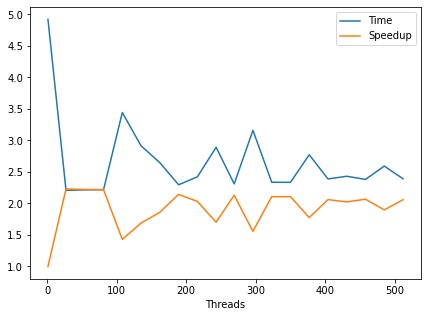

In [8]:
running_type = "C"
df[df["Type"] == running_type][["Type", "Threads", "Time", "Speedup"]].groupby('Type').plot(x="Threads", y=["Time", "Speedup"], figsize=(7, 5))

In [ ]:
!ls /usr/local/cuda/bin/nvprof*

/usr/local/cuda/bin/bin2c
/usr/local/cuda/bin/computeprof
/usr/local/cuda/bin/cudafe
/usr/local/cuda/bin/cudafe++
/usr/local/cuda/bin/cuda-gdb
/usr/local/cuda/bin/cuda-gdbserver
/usr/local/cuda/bin/cuda-install-samples-8.0.sh
/usr/local/cuda/bin/cuda-memcheck
/usr/local/cuda/bin/cuobjdump
/usr/local/cuda/bin/fatbinary
/usr/local/cuda/bin/g++
/usr/local/cuda/bin/gcc
/usr/local/cuda/bin/gpu-library-advisor
/usr/local/cuda/bin/nsight
/usr/local/cuda/bin/nvcc
/usr/local/cuda/bin/nvcc.profile
/usr/local/cuda/bin/nvdisasm
/usr/local/cuda/bin/nvlink
/usr/local/cuda/bin/nvprof
/usr/local/cuda/bin/nvprune
/usr/local/cuda/bin/nvvp
/usr/local/cuda/bin/ptxas

/usr/local/cuda/bin/crt:
link.stub  prelink.stub


In [ ]:
!./bin/pi

In [ ]:
!tail output2.csv

82,431,0.243425
82,458,0.244504
82,485,0.251062
82,512,0.23940840,120,0.425272
40,120,0.320597
40,120,0.359431
40,120,0.357095
40,120,0.358252
40,120,0.343038
40,120,0.389715


In [ ]:
!nvprof -V

nvprof: NVIDIA (R) Cuda command line profiler
Copyright (c) 2012 - 2016 NVIDIA Corporation
Release version 8.0.61 (21)


In [ ]:
%%shell

/usr/local/cuda-10.0/bin/./nvprof ./bin/pi

==4433== NVPROF is profiling process 4433, command: ./bin/pi
==4433== Profiling application: ./bin/pi
==4433== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  240.74ms         1  240.74ms  240.74ms  240.74ms  calcPi(float*, long, long)
                    0.00%  6.3040us         1  6.3040us  6.3040us  6.3040us  red(float*)
                    0.00%  2.2080us         1  2.2080us  2.2080us  2.2080us  [CUDA memset]
                    0.00%  1.6000us         1  1.6000us  1.6000us  1.6000us  [CUDA memcpy DtoH]
      API calls:   54.81%  240.77ms         1  240.77ms  240.77ms  240.77ms  cudaMemcpy
                   44.96%  197.53ms         1  197.53ms  197.53ms  197.53ms  cudaMalloc
                    0.09%  412.48us         1  412.48us  412.48us  412.48us  cuDeviceTotalMem
                    0.05%  198.37us         1  198.37us  198.37us  198.37us  cudaFree
                    0.03%  148.90us        90  1.6540